In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from skimage import io
from mpl_toolkits.mplot3d import Axes3D  

## Using the Code from 13_Kmeans_cluster we will compress and image

In [2]:
def centroids(K,X):
    c = np.zeros((K,X.shape[1]))
    for k  in range(0,K):
        c[k]=X[np.random.randint(0,X.shape[0]),:]
        
    return   c
def euclidian_distance(K,X,cen):
    K=cen.shape[0]
    idx = np.zeros((X.shape[0],1))
    M=X.shape[0]
    for m in range(0,M):
        clas = np.zeros((K,1))
        for k in range(0,K):
            clas[k]=np.sqrt(((X[m]-cen[k])**2).sum(axis=0))

        idx[m]=np.argmin(clas)
    return idx

def new_centroid(K,X,idx):
    for k in range(0,K):
        s=np.zeros((1,X.shape[1]))
        A= np.where(idx==k)
        A = A[0]
        num=A.size
        for a in A:
            s=s + X[a]
        s=s/(num)
        cen[k]=s
    return  cen

def cost(K,X,idx,cen):
    m=X.shape[0]
    for k in range(0,K):
        cost=0
        A= np.where(idx==k)
        A = A[0]
        num=A.size
        for a in A:
            cost=np.sqrt(((X[a]-cen[k])**2).sum(axis=0))
        cost=cost/m
    return  cost


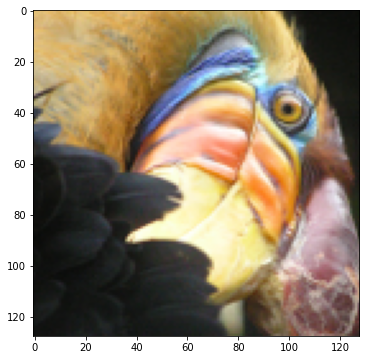

In [3]:
path=r"C:\Users\Eduardo\Documents\CARRERA\Udemy\Machine_learning_stanford\datasets\bird_small.png"
A= io.imread(path)
f,(ax0) = plt.subplots(1,1, figsize=(10,6))
ax0.imshow(A);

In [4]:
A = A/255 # Divide by 255 so that all values are in the range 0 - 1
size=A.shape
m=size[0]*size[1]
A.shape

(128, 128, 3)

In [5]:
X=A.reshape(m,3) #we collapse the (128,128,3) tensor into a (128*128,3) matrix so we can aplly K means to the data
X.shape # so we have 16384 pixels (or data examples) with 3 features (Red,Green,Blue)

(16384, 3)

In [6]:
K=16 #We want 16 clusters or 16 hyprspheres in this case
cen=centroids(K,X) # we use our function to obtain 16 random centriods

In [7]:
costs=[] # a empty vector so we can append the cost of each iteration
for i in range(0,10):      # we will compute this algorithm 10 times
    idx=euclidian_distance(K,X,cen)
    c=cost(K,X,idx,cen)
    costs.append(c)
    cen = new_centroid(K,X,idx)
cen

array([[0.09225821, 0.09962838, 0.08895015],
       [0.19353957, 0.19020389, 0.18584095],
       [0.92151048, 0.79585554, 0.55626837],
       [0.97654331, 0.92947929, 0.78240748],
       [0.53310472, 0.3889607 , 0.18816495],
       [0.88285337, 0.67467055, 0.38010403],
       [0.63836793, 0.57452895, 0.55235048],
       [0.77343559, 0.74638166, 0.7710152 ],
       [0.75771968, 0.65374728, 0.46030864],
       [0.37655971, 0.34519274, 0.35840018],
       [0.31448763, 0.25846786, 0.22548789],
       [0.74874915, 0.53542258, 0.24503719],
       [0.06587427, 0.07164787, 0.06155495],
       [0.55535721, 0.45942654, 0.39804321],
       [0.12965666, 0.13794189, 0.12872796],
       [0.43391151, 0.52823027, 0.73868778]])

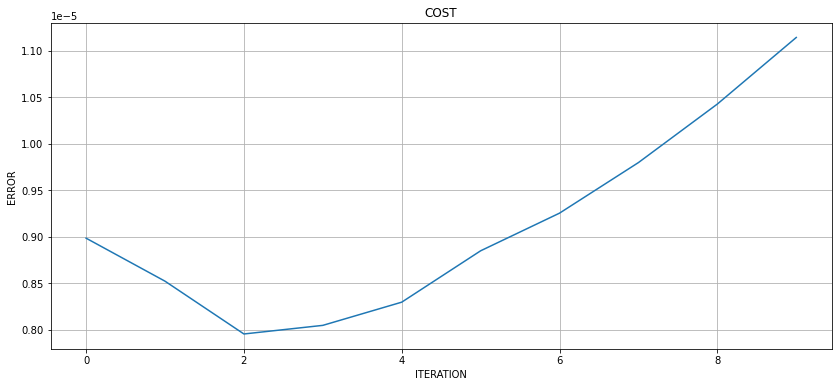

In [8]:
fig, (ax1)= plt.subplots(nrows=1, ncols=1, figsize=(14,6))  # lets plot the cost
ax1.plot(costs)
ax1.set_title("COST")
ax1.set_ylabel("ERROR")
ax1.set_xlabel("ITERATION")
plt.grid()
plt.show()

In [9]:
idx.shape # we obtain idx a 16384 classification vector (classifying each pixel in a cluster from 0 to 15)

(16384, 1)

In [10]:
X_recovered = cen[idx.astype(int),:]  # we assiaing each pixel the value of its cluster

In [11]:
X_recovered.shape

(16384, 1, 3)

In [12]:
#X_recovered*255  # we multiply by 255 in order to obtain the values from 0 to 255 again just to verify

In [13]:
X_recovered=X_recovered.reshape(size[0],size[1],3) #we reshape out matrix into a tensor of the same orginal size
X_recovered.shape

(128, 128, 3)

Text(0.5, 1.0, 'Compressed')

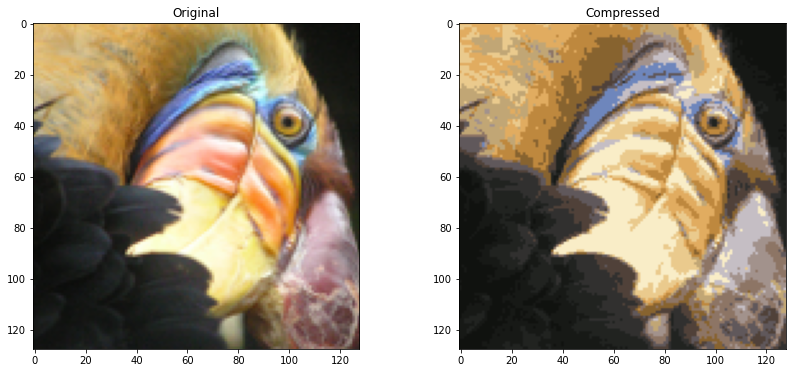

In [14]:
fig2, (ax1,ax2)= plt.subplots(nrows=1, ncols=2, figsize=(14,6))
ax1.imshow(A);
ax1.set_title("Original")
ax2.imshow(X_recovered);
ax2.set_title("Compressed")

### In order to understand this section read _15 and _16

In [102]:
# visualization of clusters with PCA

In [103]:
sel =np.random.randint(0, high=16384,size=1000)
X_scatter=X[sel]
c=idx[sel]

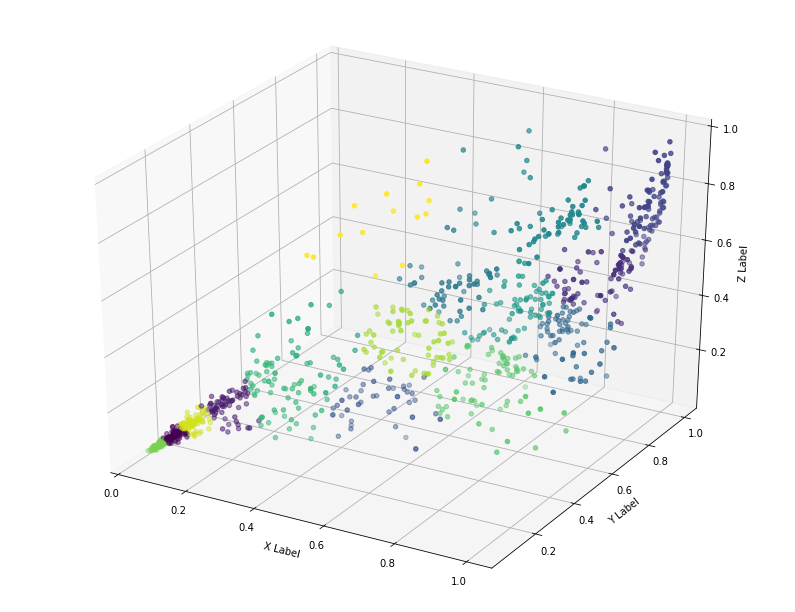

In [104]:
fig = plt.figure(figsize=(14,11))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.scatter(X_scatter[:,0],X_scatter[:,1],X_scatter[:,2], c=c)
plt.show()

In [105]:
# It will be useful to see do this visualization in 2D therefore lets use PCA

def covariance_matrix(X):
    m=X.shape[0]
    sigma =(1/m)*X.T.dot(X)
    return sigma

def standarization(data):
    data=data.astype('float64')
    for i in range(0,data.shape[1]): 
        x=data[:,i]
        # calculating mean
        mean=0
        n=len(x)
        for j in range(0,n):
            mean += x[j]
        mean= mean/n

        #calculating standard deviation
        sdv=0
        for j in range(0,n):
            sdv += (x[j]-mean)**2
        sdv=np.sqrt(sdv/n)

        #calculating standarization
        x_stand=np.zeros(n)
        for j in range(0,n):
            data[j,i] =float((data[j,i]-mean)/sdv)
    return data
    

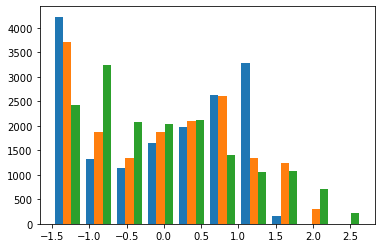

In [106]:
Xnn=standarization(X)
plt.hist(Xnn)
plt.show()

In [91]:
sigma =  covariance_matrix(Xnn)
u, S, v= np.linalg.svd(sigma, full_matrices=True)
u.shape

(3, 3)

In [99]:
K=2
z= np.zeros((Xnn.shape[0],K))
for k in range(0,K):
    for i in range(0,Xnn.shape[0]):
        uk = u[:,k]
        x=Xnn[i,:]
        z[i,k]=x.dot(uk)
z.shape

(16384, 2)

In [100]:
z_scatter=z[sel]

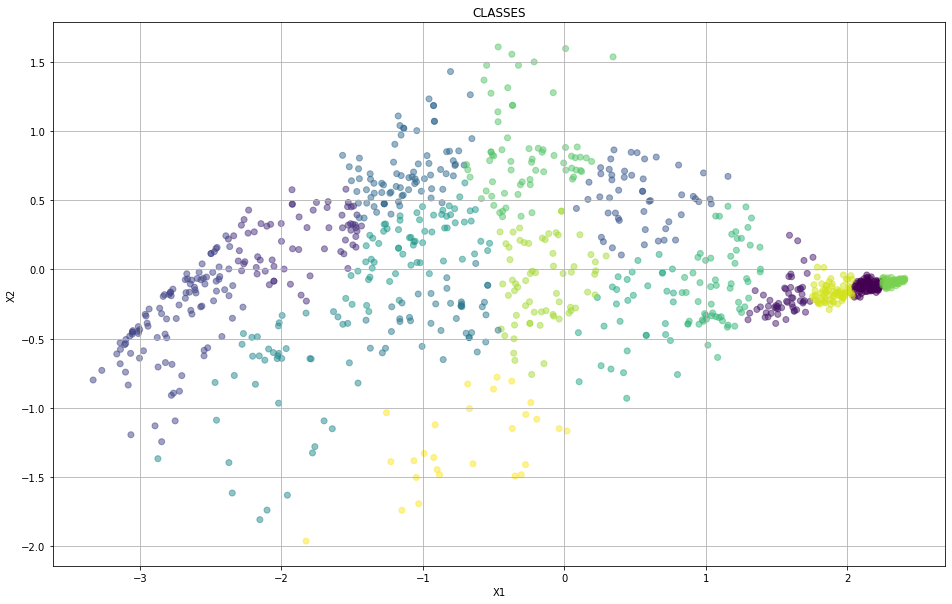

In [98]:
fig2, (ax1)= plt.subplots(nrows=1, ncols=1, figsize=(16,10))

ax1.scatter(z_scatter[:,0],z_scatter[:,1], c=c, alpha=0.5)
ax1.set_title("CLASSES")
ax1.set_ylabel("X2")
ax1.set_xlabel("X1")

plt.grid()
plt.show()

In [109]:
K=2
a=0
b=0
for i in range(0,K):
    a+=S[i]
for j in range(0,X.shape[1]):
    b+=S[j]
test2=1-(a/b)
test2
print("Variance retained by pca in K=100:",(1-test2)*100,"%")

Variance retained by pca in K=100: 99.34170083212646 %
